# IMPORT RELEVANT LIBRARIES

In [1]:
import numpy as np, os
import matplotlib.pyplot as plt
import tools21cm as t2c

from tqdm import tqdm
from sklearn.decomposition import PCA as sciPCA

In [2]:
path_out = '/scratch/snx3000/mibianco/test_pca/'
path_in = '/store/ska/sk09/segunet/inputs/dataLC_128_train_190922/'

for i in tqdm(range(10000)):
    if not (os.path.exists(path_in+'data/dT4pca_21cm_i%d.bin' %i) or os.path.exists(path_out+'data/dT4pca_21cm_i%d.bin' %i)):
        """
        dT4 = t2c.read_cbin(path_in+'data/dT4_21cm_i%d.bin' %i)
        data_flat = np.reshape(dT4, (-1, dT4.shape[2]))
        pca = sciPCA(n_components=7)
        datapca = pca.fit_transform(data_flat)
        pca_FG = pca.inverse_transform(datapca)
        dT4pca = np.reshape(data_flat - pca_FG, dT4.shape)
        t2c.save_cbin(path_out+'dT4pca_21cm_i%d.bin' %i, dT4pca)
        """
        print(i)
    else:
        pass

100%|██████████| 10000/10000 [00:16<00:00, 623.22it/s]


In [4]:
os.path.exists(path_out+'data/dT4pca_21cm_i%d.bin' %0)

False

In [8]:
from glob import glob

len(glob('/store/ska/sk09/segunet/inputs/dataLC_128_train_190922/data/dT4pca_21cm_i*.bin')) + len(glob('/scratch/snx3000/mibianco/test_pca/data/dT4pca_21cm_i*.bin'))

10000

## INPUTS

In [8]:
path_out = '/scratch/snx3000/mibianco/test_pca/'
#path_input = '/store/ska/sk09/test_wedge/'
path_input = '/store/ska/sk09/segunet/inputs/dataLC_128_pred_310822/'
i = 0

dT2 = t2c.read_cbin('%sdT2_21cm_i%d.bin' %(path_input+'data/', i))
dT3 = t2c.read_cbin('%sdT3_21cm_i%d.bin' %(path_input+'data/', i))
dT4 = t2c.read_cbin('%sdT4_21cm_i%d.bin' %(path_input+'data/', i))
dT5 = t2c.read_cbin('%sdT5_21cm_i%d.bin' %(path_input+'data/', i))
mask_xH = t2c.read_cbin('%sxH_21cm_i%d.bin' %(path_input+'data/', i))

zs = np.loadtxt(path_input+'lc_redshifts.txt')
nu = 1.41 / (1 + zs) * 1000 

npix, nfreq = 128, 552

## PCA

In [13]:
#data = (tot_fg)[...]
#data = (fg)[...]
data = dT4
data_flat = np.reshape(data, (npix*npix, nfreq))

# calcualte PCA for n_components
pca = sciPCA(n_components=10)
datapca = pca.fit_transform(data_flat)
pca_FG = pca.inverse_transform(datapca)
pca_HI = np.reshape(data_flat -pca_FG, (npix, npix, nfreq))

# calculate PCA residual
pca_res = pca_HI - dT2

[0, 171, 440]
dT5


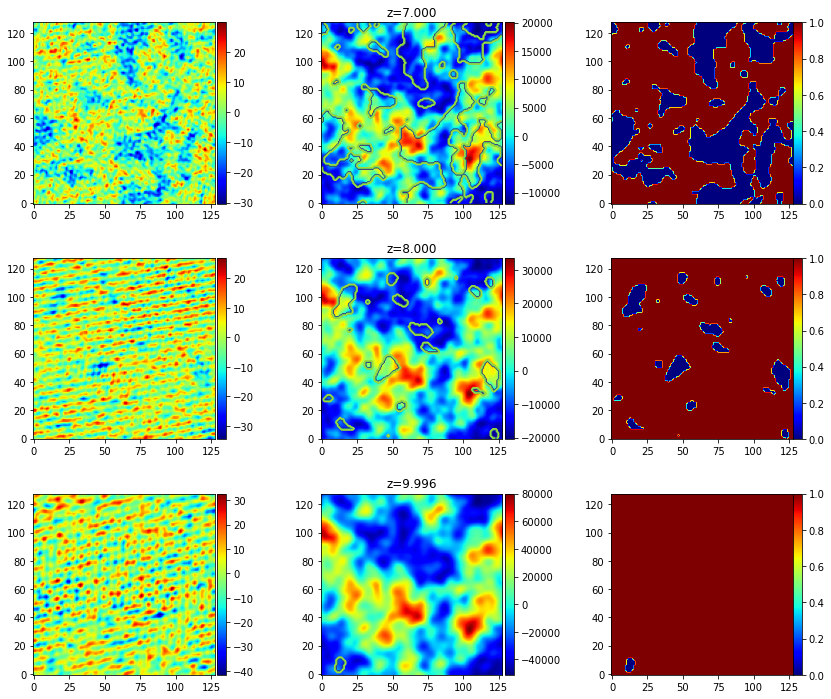

CPU times: user 5.75 s, sys: 2.8 s, total: 8.56 s
Wall time: 4.57 s


<Figure size 432x288 with 0 Axes>

In [28]:
%%time
#var_arr = ['dT3', 'dT4', 'dT5']
var_arr = ['dT5']
arr_plot = [np.argmin(np.abs(zs - search_z)) for search_z in [7, 8, 10]]
#arr_plot = np.arange(170,174)
print(arr_plot)

for var in var_arr:
    if(var == 'dT3'):
        data = dT3
    elif(var == 'dT4'):
        data = dT4
    elif(var == 'dTfn'):
        data = dT5
        
    data_flat = np.reshape(data, (npix*npix, nfreq))

    # calcualte PCA for n_components
    pca = sciPCA(n_components=7)
    datapca = pca.fit_transform(data_flat)
    pca_FG = pca.inverse_transform(datapca)
    pca_HI = np.reshape(data_flat - pca_FG, (npix, npix, nfreq))
    
    fig, axs = plt.subplots(len(arr_plot), 3, figsize=(15,12), facecolor='white')

    for i, i_plot in enumerate(arr_plot):
        ax1, ax2, ax3 = axs[i]
        im = ax1.imshow(pca_HI[..., i_plot], origin='lower', cmap='jet')
        
        #ax1.contour(mask_xH[..., i_plot])
        plt.colorbar(im, ax=ax1, pad=0.01, fraction=0.048)
        
        ax2.set_title('z=%.3f' %zs[i_plot])
        ax2.contour(mask_xH[..., i_plot])
        im = ax2.imshow(data[..., i_plot], origin='lower', cmap='jet')
        plt.colorbar(im, ax=ax2, pad=0.01, fraction=0.048)
        
        #im = ax3.imshow(dT2[..., i_plot], origin='lower', cmap='jet')
        im = ax3.imshow(mask_xH[..., i_plot], origin='lower', cmap='jet')
        plt.colorbar(im, ax=ax3, pad=0.0, fraction=0.048)
        
        plt.subplots_adjust(wspace=0.1, hspace=0.3)
    plt.savefig('%spca_comparison_%s.png' %(path_out, var), bbox_inches='tight')
    print(var)
    plt.show()
    plt.clf()

In [39]:
np.sum(mask_xH[...,440] == 1) + np.sum(mask_xH[...,440] == 0), 128**2

(16384, 16384)

## comparison with wedge

dT3


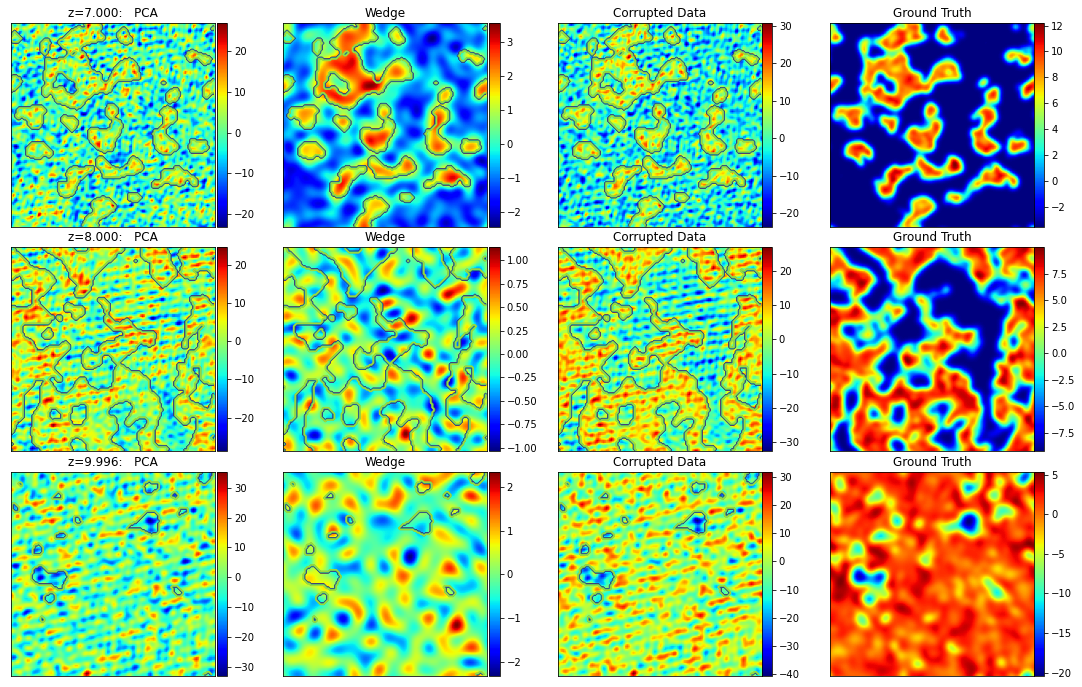

dT3gf


<Figure size 432x288 with 0 Axes>

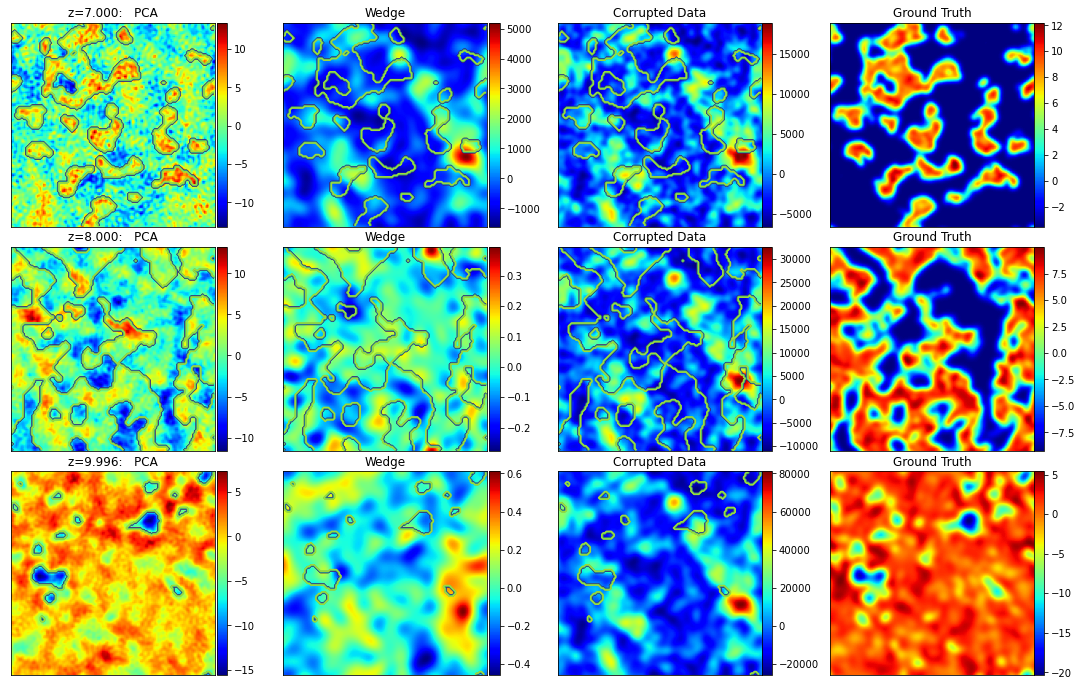

dT3exgf


<Figure size 432x288 with 0 Axes>

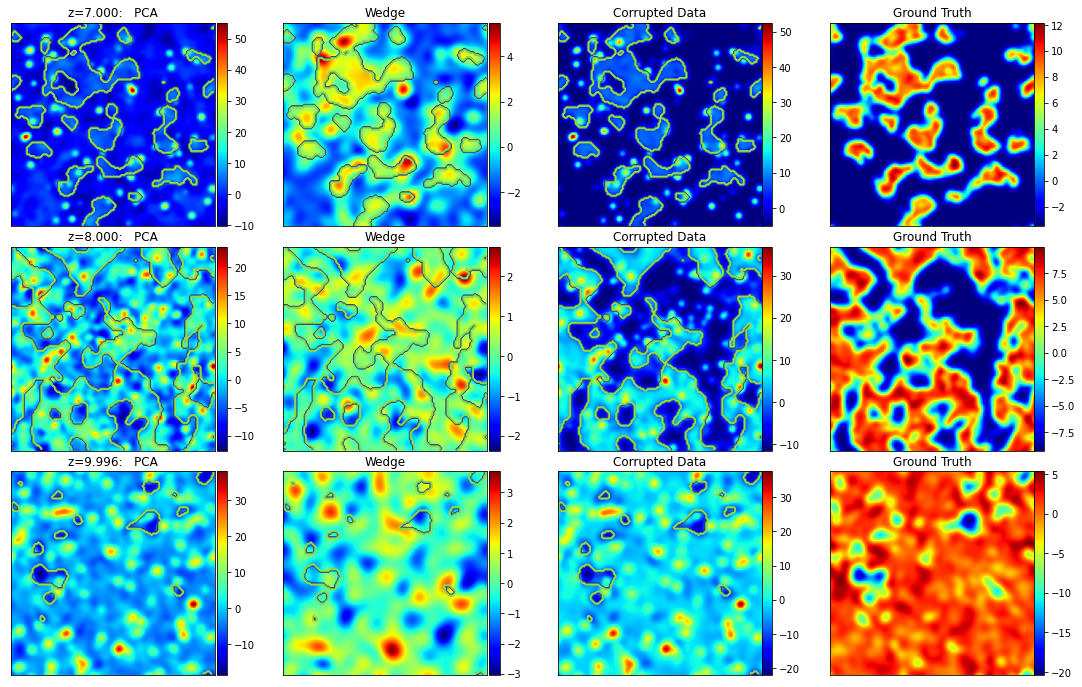

dTfn


<Figure size 432x288 with 0 Axes>

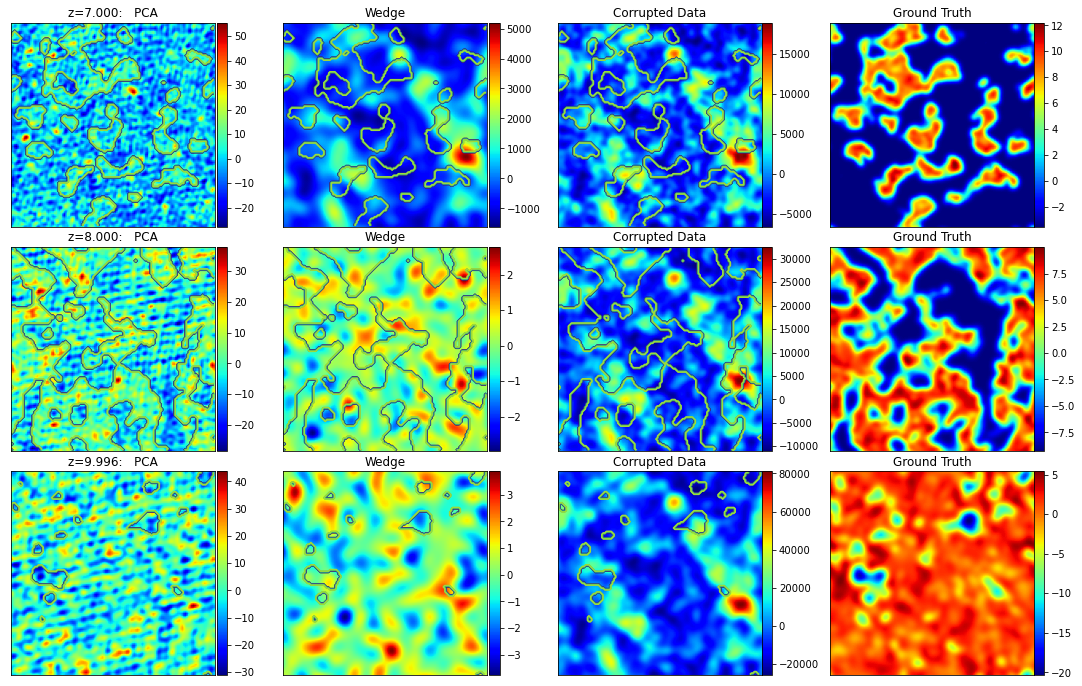

<Figure size 432x288 with 0 Axes>

In [6]:
#var_arr = ['dT3', 'dT3gf', 'dT3exgf']
#var_arr = ['dT3', 'dT3gf']
var_arr = ['dT3', 'dT3gf', 'dT3exgf', 'dTfn']
#var_arr = ['dT3exgf']
arr_plot = [np.argmin(np.abs(zs - search_z)) for search_z in [7, 8, 10]]

for var in var_arr:
    if(var == 'dT3'):
        data = (noise)[...]
    elif(var == 'dT3gf'):
        data = (fg)[...]
    elif(var == 'dT3exgf'):
        data = (ex)[...]
    elif(var == 'dTfn'):
        data = (tot_fg)[...]
    data_flat = np.reshape(data, (npix*npix, nfreq))

    # calcualte PCA for n_components
    pca = sciPCA(n_components=10)
    datapca = pca.fit_transform(data_flat)
    pca_FG = pca.inverse_transform(datapca)
    pca_HI = np.reshape(data_flat -pca_FG, (npix, npix, nfreq))
    
    fig, axs = plt.subplots(3, 4, figsize=(19,12), facecolor='white')
    wedge_HI = np.load('/store/ska/sk09/test_wedge/%swdg_21cm.npy' %var)
    
    for i, i_plot in enumerate(arr_plot):
        ax1, ax2, ax3, ax4 = axs[i]
        ax1.set_title('z=%.3f:   PCA' %zs[i_plot])
        im = ax1.imshow(pca_HI[..., i_plot], origin='lower', cmap='jet')
        ax1.contour(mask_xH[..., i_plot])
        plt.colorbar(im, ax=ax1, pad=0.01, fraction=0.048)

        ax2.set_title('Wedge')
        ax2.contour(mask_xH[..., i_plot])
        im = ax2.imshow(wedge_HI[..., i_plot], origin='lower', cmap='jet')
        plt.colorbar(im, ax=ax2, pad=0.01, fraction=0.048)

        ax3.set_title('Corrupted Data')
        ax3.contour(mask_xH[..., i_plot])
        im = ax3.imshow(data[..., i_plot], origin='lower', cmap='jet')
        plt.colorbar(im, ax=ax3, pad=0.0, fraction=0.048)

        ax4.set_title('Ground Truth')
        im = ax4.imshow(hi[..., i_plot], origin='lower', cmap='jet')
        plt.colorbar(im, ax=ax4, pad=0.0, fraction=0.048)

        plt.subplots_adjust(wspace=0.12, hspace=0.1)
        
    for ax in axs.flatten():
        ax.set_xticks([])
        ax.set_yticks([])

    plt.savefig('%sforeground_comparison_%s.png' %(path_out, var), bbox_inches='tight')
    print(var)
    plt.show()
    plt.clf()

In [4]:
import numpy as np, h5py
import healpy.pixelfunc as hp
import tools21cm as t2c

import astropy.units as u
from astropy.cosmology import Planck18 as cosmo 

path_out = '/scratch/snx3000/mibianco/test_tianML/'

Lx = hp.nside2resol(256)*64 #length per side in radians
nreal = 10 #number of realisations
nfreq = 64 # number of freq channels
freq_min = 700. # Min freq in MHz
freq_max = 1020. # Max freq in MHz
nu = np.linspace(freq_min, freq_max, nfreq)
z = 1420./nu -1 #redshift

HImap_true = np.load(path_out+'HImap_true.npy')
HImap_PCA =  np.load(path_out+'HImap_PCA.npy')
HImap_ML = np.load(path_out+'HImap_ML.npy')

Lbox = (Lx * cosmo.angular_diameter_distance(z)).to(u.Mpc).value

In [20]:
#idx_z = [0, 31, 63]
idx_z = [5, 40]
print(z[idx_z])

[0.95754923 0.57223199]


In [30]:
import matplotlib.pyplot as plt

for j in range(nreal):
    for i in idx_z:
        ps_ML, ks_ML = t2c.power_spect_1d(HImap_ML[j,...,i][...,np.newaxis], kbins=15, box_dims=Lbox[i])
        ps_PCA, ks_PCA = t2c.power_spect_1d(HImap_PCA[j,...,i][...,np.newaxis], kbins=15, box_dims=Lbox[i])
        ps_T, ks_T = t2c.power_spect_1d(HImap_true[j,...,i][...,np.newaxis], kbins=15, box_dims=Lbox[i])

        plt.rcParams['figure.figsize'] = [12, 8]
        plt.rcParams['font.size'] = 16

        #plt.title('Spherically averaged power spectrum.')
        #plt.loglog(ks_ML, ps_ML*ks_ML**3/2/np.pi**2, label='ML')
        #plt.loglog(ks_PCA, ps_PCA*ks_PCA**3/2/np.pi**2, label='PCA')
        #plt.loglog(ks_T, ps_T*ks_T**3/2/np.pi**2, label='Ground Truth', color='k', ls='--')
        #plt.loglog(ks_ML, ps_ML, label='ML', color='tab:blue', ls='-')
        #plt.loglog(ks_PCA, ps_PCA, label='PCA', color='tab:orange', ls='-.')
        #plt.loglog(ks_T, ps_T, label='Ground Truth', color='k', ls='--')
        plt.loglog(ks_ML, ps_ML, label='ML', ls='-')
        plt.loglog(ks_PCA, ps_PCA, label='PCA', ls='-.')
        plt.loglog(ks_T, ps_T, label='Ground Truth', color='k', ls='--')

        plt.xlabel('k (Mpc$^{-1}$)')
        #plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')
        plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')

    plt.legend()
    #plt.show()
    #plt.savefig('%sPs_r%dz%d.png' %(path_out, j, i), bbox_inches='tight')
    plt.savefig('%sPs_r%dz5_40.png' %(path_out, j), bbox_inches='tight', facecolor='white')
    plt.clf()

<Figure size 864x576 with 0 Axes>